<h1 style="text-align:center"> End-To-End Deployment of Zomato Restaurant Ratings</h1>

<img src='img.PNG' width='400px' height='400px'>

Zomato is one of the best online food delivery apps which gives the users the ratings and the reviews on restaurants all over india.These ratings and the Reviews are considered as one of the most important deciding factors which determine how good a restaurant is.

We will therefore use the real time Data set with variuos features a user would look into regarding a restaurant. We will be considering Banglore City in this analysis.

Content The basic idea of analyzing the Zomato dataset is to get a fair idea about the factors affecting the establishment of different types of restaurant at different places in Bengaluru, aggregate rating of each restaurant, Bengaluru being one such city has more than 12,000 restaurants with restaurants serving dishes from all over the world.

With increasing demand of Restaurants it has become difficult for new restaurants to compete with established restaurants. Most of them serving the same food. Most of the people here are dependent mainly on the restaurant food as they don’t have time to cook for themselves.

With such an overwhelming demand of restaurants it has therefore become important to study the demography of a location. What kind of a food is more popular in a locality. Do the entire locality loves vegetarian food. If yes then is that locality populated by a particular sect of people for eg. Jain, Marwaris, Gujaratis who are mostly vegetarian. These kind of analysis can be done using the data, by studying the factors such as

• Location of the restaurant
• Approx Price of food
• Theme based restaurant or not
• Which locality of that city serves that cuisines with maximum number of restaurants
• The needs of people who are striving to get the best cuisine of the neighborhood
• Is a particular neighborhood famous for its own kind of food.


Source: Kaggle


In [65]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.graph_objs as go
import plotly.offline as py

import warnings
warnings.filterwarnings('ignore');
%matplotlib inline

In [66]:
data = pd.read_csv('zomato.csv')

In [67]:
data.head(5)

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


### Columns description
1. **url** </B> contains the url of the restaurant in the zomato website

2. **address** contains the address of the restaurant in Bengaluru

3. **name** contains the name of the restaurant

4. **online_order** whether online ordering is available in the restaurant or not

5. **book_table** table book option available or not

6. **rate** contains the overall rating of the restaurant out of 5

7. **votes** contains total number of rating for the restaurant as of the above mentioned date

8. **phone** contains the phone number of the restaurant

9. **location** contains the neighborhood in which the restaurant is located

10. **rest_type** restaurant type

11. **dish_liked** dishes people liked in the restaurant

12. **cuisines** food styles, separated by comma

13. **approx_cost(for two people)** contains the approximate cost of meal for two people

14. **reviews_list** list of tuples containing reviews for the restaurant, each tuple

15. **menu_item** contains list of menus available in the restaurant

16. **listed_in(type)** type of meal

17. **listed_in(city)** contains the neighborhood in which the restaurant is listed

In [68]:
data.shape

(51717, 17)

In [69]:
data.dtypes

url                            object
address                        object
name                           object
online_order                   object
book_table                     object
rate                           object
votes                           int64
phone                          object
location                       object
rest_type                      object
dish_liked                     object
cuisines                       object
approx_cost(for two people)    object
reviews_list                   object
menu_item                      object
listed_in(type)                object
listed_in(city)                object
dtype: object

In [70]:
data.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [71]:
# We can use pandas profiling to get an overall overview of the Dataset
# !pip install pandas_profiling 
# import pandas_profiling as pf
# pf.ProfileReport(data)

In [72]:
#Deleting Unnnecessary Columns
df = data.drop(['url','phone'],axis=1)

In [73]:
df.duplicated().sum()

43

In [74]:
df.drop_duplicates(inplace=True)

In [75]:
df.duplicated().sum()

0

#### Drop null values

In [76]:
df.dropna(how='any', inplace=True)
df.head()

,address,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


#### Renaming columes appropriately

In [77]:
df.columns

Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [78]:
df = df.rename(columns={'approx_cost(for two people)':'cost', 'listed_in(type)':'type', 'listed_in(city)':'city'})

In [79]:
df.head()

,address,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,cost,reviews_list,menu_item,type,city
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


## Cleaning the Data

In [80]:
df['cost'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '750', '200', '850', '1,200', '150', '350', '250', '1,500',
       '1,300', '1,000', '100', '900', '1,100', '1,600', '950', '230',
       '1,700', '1,400', '1,350', '2,200', '2,000', '1,800', '1,900',
       '180', '330', '2,500', '2,100', '3,000', '2,800', '3,400', '40',
       '1,250', '3,500', '4,000', '2,400', '1,450', '3,200', '6,000',
       '1,050', '4,100', '2,300', '120', '2,600', '5,000', '3,700',
       '1,650', '2,700', '4,500'], dtype=object)

#### replacing the ',' with nothing and converting it to float

In [81]:
df['cost'] = df['cost'].apply(lambda x:x.replace(',', ''))
df['cost'] = df['cost'].astype(float)

In [82]:
print(df['cost'].unique())

print('---'*10)

print(df.dtypes)

[ 800.  300.  600.  700.  550.  500.  450.  650.  400.  750.  200.  850.
 1200.  150.  350.  250. 1500. 1300. 1000.  100.  900. 1100. 1600.  950.
  230. 1700. 1400. 1350. 2200. 2000. 1800. 1900.  180.  330. 2500. 2100.
 3000. 2800. 3400.   40. 1250. 3500. 4000. 2400. 1450. 3200. 6000. 1050.
 4100. 2300.  120. 2600. 5000. 3700. 1650. 2700. 4500.]
------------------------------
address          object
name             object
online_order     object
book_table       object
rate             object
votes             int64
location         object
rest_type        object
dish_liked       object
cuisines         object
cost            float64
reviews_list     object
menu_item        object
type             object
city             object
dtype: object


In [83]:
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '4.6/5', '4.0/5', '4.2/5', '3.9/5',
       '3.0/5', '3.6/5', '2.8/5', '4.4/5', '3.1/5', '4.3/5', '2.6/5',
       '3.3/5', '3.5/5', '3.8 /5', '3.2/5', '4.5/5', '2.5/5', '2.9/5',
       '3.4/5', '2.7/5', '4.7/5', 'NEW', '2.4/5', '2.2/5', '2.3/5',
       '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5', '4.1 /5', '2.9 /5',
       '2.7 /5', '2.5 /5', '2.6 /5', '4.5 /5', '4.3 /5', '3.7 /5',
       '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '3.4 /5', '3.6 /5',
       '3.3 /5', '4.6 /5', '4.9 /5', '3.2 /5', '3.0 /5', '2.8 /5',
       '3.5 /5', '3.1 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [84]:
df = df.loc[df.rate != 'NEW']       #getting rid of "NEW"

In [85]:
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '4.6/5', '4.0/5', '4.2/5', '3.9/5',
       '3.0/5', '3.6/5', '2.8/5', '4.4/5', '3.1/5', '4.3/5', '2.6/5',
       '3.3/5', '3.5/5', '3.8 /5', '3.2/5', '4.5/5', '2.5/5', '2.9/5',
       '3.4/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5', '4.8/5',
       '3.9 /5', '4.2 /5', '4.0 /5', '4.1 /5', '2.9 /5', '2.7 /5',
       '2.5 /5', '2.6 /5', '4.5 /5', '4.3 /5', '3.7 /5', '4.4 /5',
       '4.9/5', '2.1/5', '2.0/5', '1.8/5', '3.4 /5', '3.6 /5', '3.3 /5',
       '4.6 /5', '4.9 /5', '3.2 /5', '3.0 /5', '2.8 /5', '3.5 /5',
       '3.1 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5', '2.1 /5',
       '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [86]:
# Removing /5 from rates

df['rate'] = df['rate'].apply(lambda x:x.replace('/5', ''))

In [87]:
df['rate'].unique()

array(['4.1', '3.8', '3.7', '4.6', '4.0', '4.2', '3.9', '3.0', '3.6',
       '2.8', '4.4', '3.1', '4.3', '2.6', '3.3', '3.5', '3.8 ', '3.2',
       '4.5', '2.5', '2.9', '3.4', '2.7', '4.7', '2.4', '2.2', '2.3',
       '4.8', '3.9 ', '4.2 ', '4.0 ', '4.1 ', '2.9 ', '2.7 ', '2.5 ',
       '2.6 ', '4.5 ', '4.3 ', '3.7 ', '4.4 ', '4.9', '2.1', '2.0', '1.8',
       '3.4 ', '3.6 ', '3.3 ', '4.6 ', '4.9 ', '3.2 ', '3.0 ', '2.8 ',
       '3.5 ', '3.1 ', '4.8 ', '2.3 ', '4.7 ', '2.4 ', '2.1 ', '2.2 ',
       '2.0 ', '1.8 '], dtype=object)

## Visualizations

Text(0.5, 0, 'Number of Outlets')

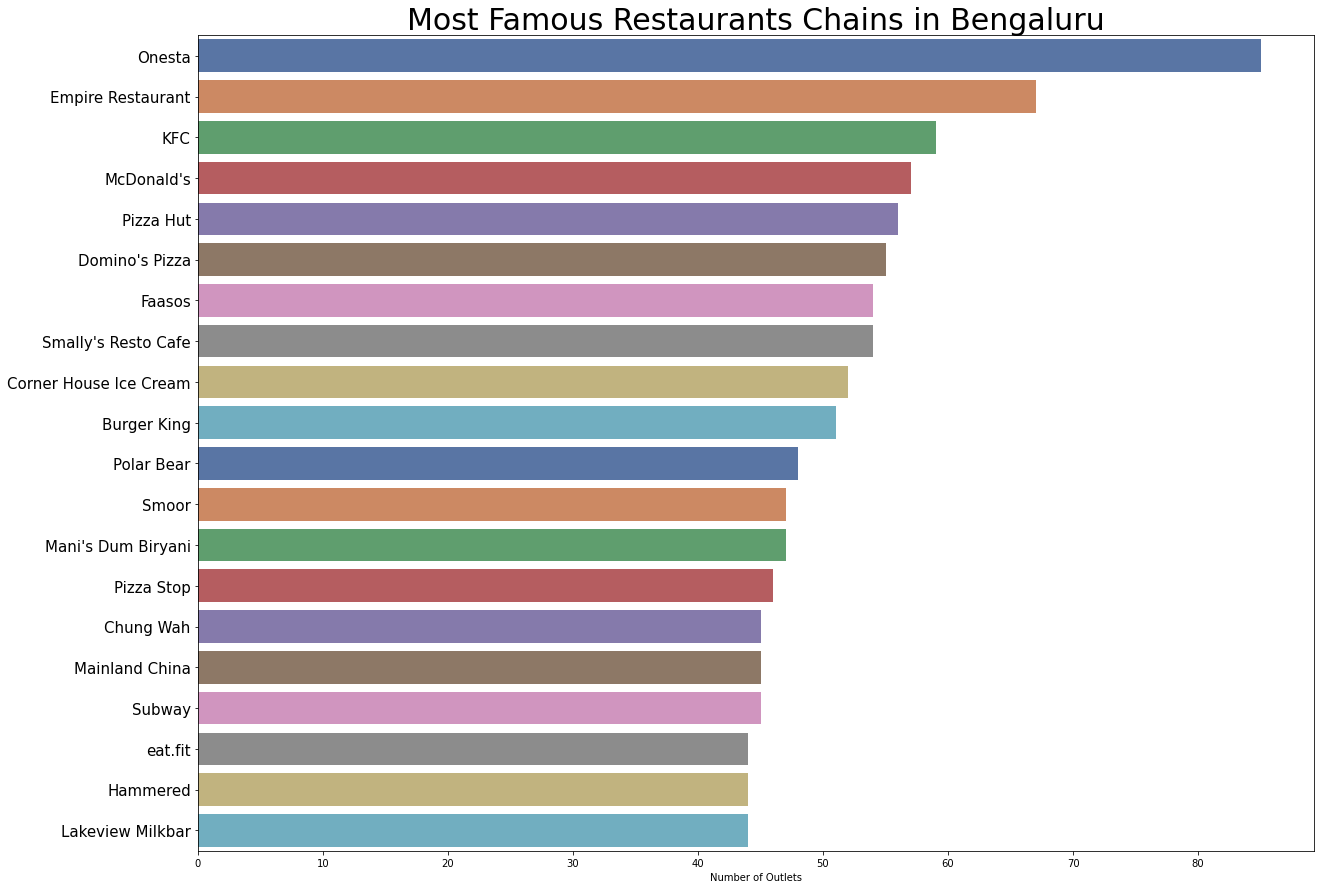

In [88]:
plt.figure(figsize=(20, 15))
chains = df['name'].value_counts()[:20]
sns.barplot(x=chains, y=chains.index, palette='deep')
plt.title('Most Famous Restaurants Chains in Bengaluru', fontsize=30)
plt.yticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Number of Outlets')

### Whether Restaurant offers Table Booking

In [89]:
x = df['book_table'].value_counts()
colors = ['#800080', '#0000A0']

trace = go.Pie(labels=x.index,values=x, marker=dict(colors=colors, line=dict(color='black', width=2)))
layout = go.Layout(title='Table Booking', width=600, height=600)
fig = go.Figure(data=[trace], layout=layout)
py.iplot(fig,filename='pie_chart_subplots')

#### Insight 

Most of the Restaurants do not offer Table Booking

<br><br>

### Whether Restaurant delivers online or not

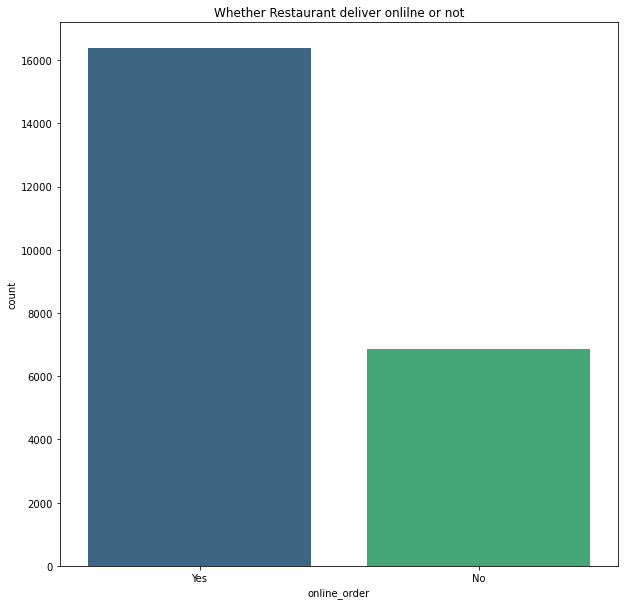

In [90]:
#Restaurants delivering Online or not
sns.countplot(df['online_order'],palette='viridis')
fig = plt.gcf()
fig.set_size_inches(10, 10)
plt.title('Whether Restaurant deliver onlilne or not')
plt.show()

**Insight**

Most of the Restaurant's offer option for online order and delivery







<br><br>

## Rating Distributions

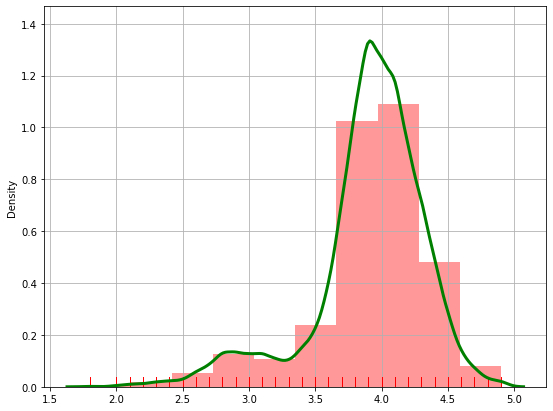

In [91]:
# how ratings are distributed
plt.figure(figsize=(9, 7))
sns.distplot(x=df['rate'], rug=True, bins=10, color="red", kde_kws={"color": "g", "lw": 3, "label": "KDE"})
plt.grid()

**Insight**

Most of the Restaurant's ratings are within 3.5 and 4.5

### Count of Ratings as between "1 and 2", "2 and 3", "3 and 4", "4 and 5"

In [92]:
df['rate'].unique()

array(['4.1', '3.8', '3.7', '4.6', '4.0', '4.2', '3.9', '3.0', '3.6',
       '2.8', '4.4', '3.1', '4.3', '2.6', '3.3', '3.5', '3.8 ', '3.2',
       '4.5', '2.5', '2.9', '3.4', '2.7', '4.7', '2.4', '2.2', '2.3',
       '4.8', '3.9 ', '4.2 ', '4.0 ', '4.1 ', '2.9 ', '2.7 ', '2.5 ',
       '2.6 ', '4.5 ', '4.3 ', '3.7 ', '4.4 ', '4.9', '2.1', '2.0', '1.8',
       '3.4 ', '3.6 ', '3.3 ', '4.6 ', '4.9 ', '3.2 ', '3.0 ', '2.8 ',
       '3.5 ', '3.1 ', '4.8 ', '2.3 ', '4.7 ', '2.4 ', '2.1 ', '2.2 ',
       '2.0 ', '1.8 '], dtype=object)

In [93]:
min_rates = df.loc[df.rate == df.rate.min()]
print(min_rates['name'].loc[6300],"Restaurant is having Minimum Ratings")

Alibi - Maya International Hotel Restaurant is having Minimum Ratings


In [94]:
max_rates = df.loc[df.rate==df.rate.max()]
print('Restaurants having highest Ratings')
max_rates['name'].unique()

Restaurants having highest Ratings


array(['Belgian Waffle Factory', "AB's - Absolute Barbecues",
       'Asia Kitchen By Mainland China', 'Punjab Grill',
       'SantÃ\x83Â\x83Ã\x82Â\x83Ã\x83Â\x82Ã\x82Â\x83Ã\x83Â\x83Ã\x82Â\x82Ã\x83Â\x82Ã\x82Â\x83Ã\x83Â\x83Ã\x82Â\x83Ã\x83Â\x82Ã\x82Â\x82Ã\x83Â\x83Ã\x82Â\x82Ã\x83Â\x82Ã\x82Â© Spa Cuisine',
       'Byg Brewski Brewing Company', 'Flechazo'], dtype=object)

In [95]:
df['rate'] = df['rate'].astype('float')

In [96]:
((df['rate']>=1) & (df['rate']<2)).sum()

5

In [97]:
((df['rate']>=2) & (df['rate']<3)).sum()

1179

In [98]:
((df['rate']>=3) & (df['rate']<4)).sum()

10153

In [99]:
((df['rate']>=4) & (df['rate']<5)).sum()

11911

**Plotting the counts with the help of pie chart**

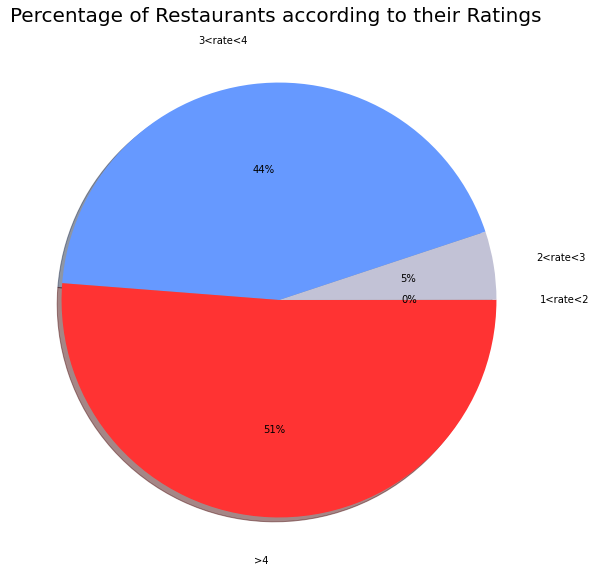

In [100]:
slices = [((df['rate']>=1) & (df['rate']<2)).sum(),
          ((df['rate']>=2) & (df['rate']<3)).sum(),
          ((df['rate']>=3) & (df['rate']<4)).sum(),
          ((df['rate']>=4) & (df['rate']<5)).sum()
         ]

labels = ['1<rate<2', '2<rate<3', '3<rate<4', '>4']
colors = ['#ff3333','#c2c2d6','#6699ff']
plt.pie(slices,labels = labels, colors=colors, autopct='%.f%%', pctdistance=0.6, shadow=True, labeldistance=1.2);
plt.title('Percentage of Restaurants according to their Ratings ', fontsize=20)

fig = plt.gcf()
fig.set_size_inches(10,10)

<br><br>

## Service Types

Text(0.5, 1.0, 'Types of Services')

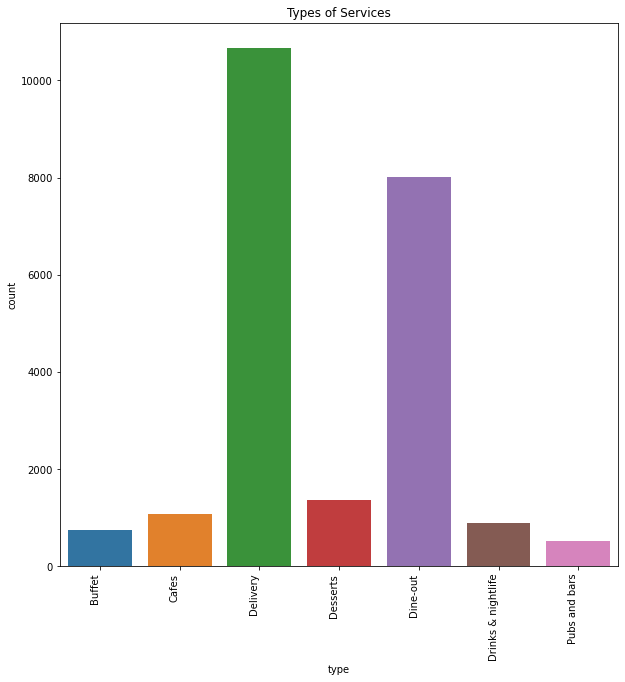

In [101]:
sns.countplot(df['type']).set_xticklabels(sns.countplot(df['type']).get_xticklabels(), rotation=90, ha='right');
fig = plt.gcf()
fig.set_size_inches(10, 10)
plt.title('Types of Services')

**Insight**

Here the two main services are **Delivery** and **Dine-out**

<br><br>

## Distribution of Cost of Food for two People

In [102]:
trace0 = go.Box(y=df['cost'], name = 'Accepting Online Orders',marker=dict(color = 'rgb(113, 10, 100)'))
layout = go.Layout(title='Box plot of approximate cost', width=800, height=800, yaxis=dict(title="Price"))
fig = go.Figure(data=[trace0], layout=layout)
py.iplot(fig)

**Insight**

Most of the Restaurants charging between 400 to 600 Amount

### Distribution of charges

<AxesSubplot:xlabel='cost', ylabel='Density'>

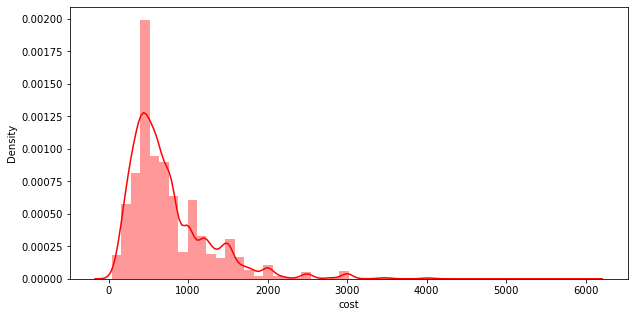

In [103]:
plt.figure(figsize=(10, 5))
sns.distplot(df['cost'],color='r')

## Most Liked Dishes

In [104]:
import re

likes=[]
df.index = range(df.shape[0])
for i in range(df.shape[0]):
    array_split = re.split(',', df['dish_liked'][i])
    for item in array_split:
        likes.append(item)

In [105]:
favourite_food = pd.Series(likes).value_counts()
favourite_food.head(30)

 Pasta              2692
 Pizza              1915
 Cocktails          1880
 Burgers            1736
 Mocktails          1623
 Biryani            1307
 Sandwiches         1287
Burgers             1256
 Coffee             1184
 Nachos             1170
 Fish               1116
 Paratha            1107
 Salads             1055
 Chicken Biryani    1004
Cocktails            891
 Fries               876
 Noodles             854
 Beer                835
 Mutton Biryani      832
 Tea                 819
Coffee               801
 Sandwich            788
 Butter Chicken      782
 Thali               770
Biryani              749
Pizza                747
 Roti                729
 Brownie             726
 Salad               677
 Hot Chocolate       672
dtype: int64

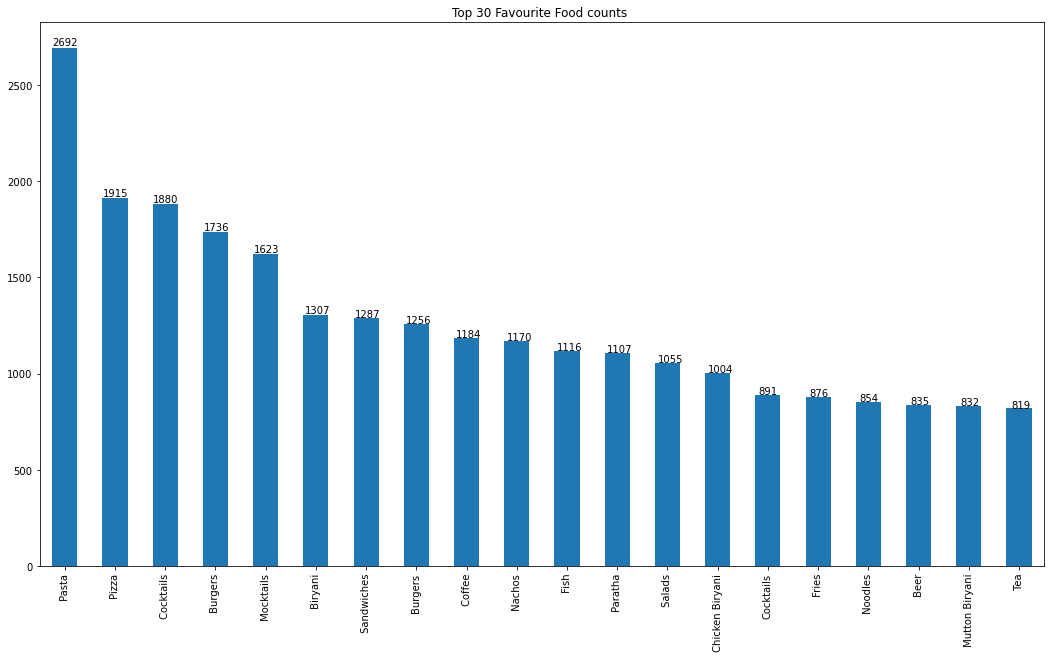

In [106]:
ax = favourite_food.nlargest(n=20, keep='first').plot(kind='bar',figsize=(18,10),title = 'Top 30 Favourite Food counts ')

for i in ax.patches:
    ax.annotate(str(i.get_height()), (i.get_x() * 1.005, i.get_height() * 1.005))

**Insight**

WE can infer from above plot that 5 most liked dishes are **Pasta**, **Pizza**, **Cocktails**, **Burgers** and **Mocktails**

<br><br>

## Restaurant types and their counts

Text(0.5, 0, 'Count')

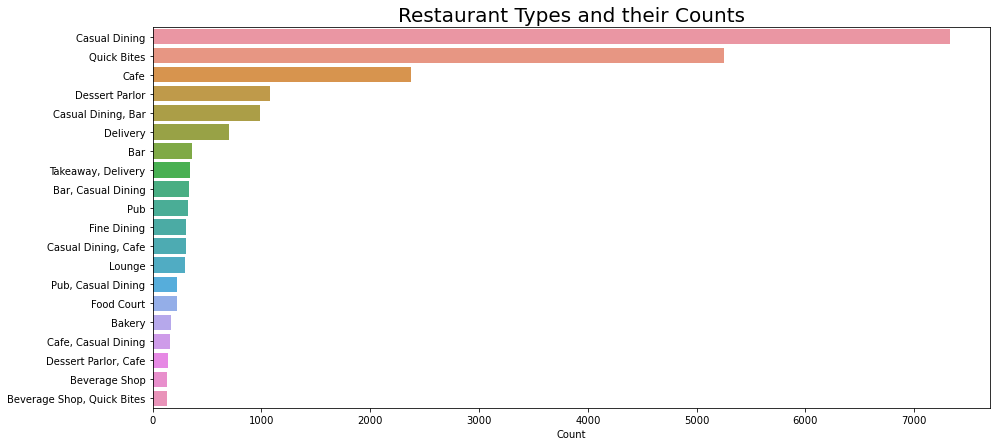

In [107]:
plt.figure(figsize=(15, 7))
rest = df['rest_type'].value_counts()[:20]
sns.barplot(rest, rest.index)
plt.title('Restaurant Types and their Counts',fontsize=20)
plt.xlabel('Count')

**Casual Dining**, **Quick Bites** and **Cafe** are the most 3 common types of Restaurants

<br><br>

## Building Model

In [108]:
df.head()

,address,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,cost,reviews_list,menu_item,type,city
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


### change the string categorical into to a categorical int

In [109]:
df.online_order[df.online_order == 'Yes'] = 1 
df.online_order[df.online_order == 'No'] = 0

df.online_order = pd.to_numeric(df.online_order)

df.online_order.value_counts()

1    16378
0     6870
Name: online_order, dtype: int64

In [110]:
df.book_table[df.book_table == 'Yes'] = 1 
df.book_table[df.book_table == 'No'] = 0

df.book_table = pd.to_numeric(df.book_table)

df.book_table.value_counts()

0    17191
1     6057
Name: book_table, dtype: int64

<br><br>

Label encode the categorical variables to make it easier to build algorithm

In [111]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [112]:
df.location = le.fit_transform(df.location)
df.rest_type = le.fit_transform(df.rest_type)
df.cuisines = le.fit_transform(df.cuisines)
df.menu_item = le.fit_transform(df.menu_item)

In [113]:
df.head()

,address,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,cost,reviews_list,menu_item,type,city
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,1,1,4.1,775,1,20,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...",1386,800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",5047,Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,1,0,4.1,787,1,20,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...",594,800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",5047,Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,1,0,3.8,918,1,16,"Churros, Cannelloni, Minestrone Soup, Hot Choc...",484,800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",5047,Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,0,0,3.7,88,1,62,Masala Dosa,1587,300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",5047,Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,0,0,3.8,166,4,20,"Panipuri, Gol Gappe",1406,600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",5047,Buffet,Banashankari


In [114]:
my_data=df.iloc[:,[2,3,4,5,6,7,9,10,12]]
# my_data.to_csv('Zomato_df.csv')

In [115]:
X = df.iloc[:,[2,3,5,6,7,9,10,12]]
X.head()

,online_order,book_table,votes,location,rest_type,cuisines,cost,menu_item
0,1,1,775,1,20,1386,800.0,5047
1,1,0,787,1,20,594,800.0,5047
2,1,0,918,1,16,484,800.0,5047
3,0,0,88,1,62,1587,300.0,5047
4,0,0,166,4,20,1406,600.0,5047


In [116]:
y = df['rate']
y.head()

0    4.1
1    4.1
2    3.8
3    3.7
4    3.8
Name: rate, dtype: float64

In [117]:
from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)


X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.3,random_state=10)

<br><br>

## Linear Regression

In [118]:
from sklearn.linear_model import LinearRegression

reg_model = LinearRegression()
reg_model.fit(X_train, y_train)

LinearRegression()

In [119]:
from sklearn.metrics import r2_score, accuracy_score

y_pred = reg_model.predict(X_test)
r2_score(y_test, y_pred)

0.22818828522967194

<br><br>

## Random Forest

In [120]:
from sklearn.ensemble import RandomForestRegressor

ran_model = RandomForestRegressor(n_estimators=650, random_state=245, min_samples_leaf=.0001)
ran_model.fit(X_train, y_train)

y_pred = ran_model.predict(X_test)
r2_score(y_test, y_pred)

0.8809706960047533

<br><br>

## Extra Regressor

In [121]:
from sklearn.ensemble import ExtraTreesRegressor
et_model = ExtraTreesRegressor(n_estimators = 120)
et_model.fit(X_train, y_train)

y_pred = et_model.predict(X_test)
r2_score(y_test, y_pred)

0.9327732826415647

In [133]:
# Use pickle to save our model so that we can use it later

import pickle 
pickle.dump(et_model, open('model.pkl','wb'))
# model = pickle.load(open('model.pkl', 'rb'))

model = pd.read_pickle ('E:/Dhara_Parikh/Dhara_Learnings/Projects/Data Science Projects/Zomato_Restaurant_Rating/model.pkl')
# model.head()

In [132]:
import pickle

def save_model(model):
    pickle.dump(model, open("model.pkl", "wb"))